## DeepFake_Face_Classification

### Import Dependencies

In [2]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from PIL import Image

import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
## Image folder containing both fake faces and real faces 
path = 'Training Data/'
folders = os.listdir(path)
folders = folders[1:] ## [1:] to remove .ds_store folder if it is made automatically otherwise just use folder

### Detection faces and storing them in two folders ( Fake and Real )

In [ ]:
for subs in folders:
    for files in os.listdir(path+subs):
        try:
            if 'Fake' in path+subs+files and 'jpg' in path+subs+files: ## If Fake in image filename
                ## Reading Image File
                pixels = pyplot.imread(path+subs+'/'+files)
                
                ## MTCNN Face Detection
                faces = detector.detect_faces(pixels)
                
                ## Getting Co-ordinates of the faces 
                coordinates = tuple(faces[0]['box'])
                
                ## Cropping Faces and storing them in Fake Faces Folder 
                Image.fromarray(pixels).crop(coordinates).save('training/Fake_Faces/'+files)
                
            elif 'Real' in path+subs+files and 'jpg' in path+subs+files: ## If real in image filename
                ## Reading Image File
                pixels = pyplot.imread(path+subs+'/'+files)
                
                ## MTCNN Face Detection
                faces = detector.detect_faces(pixels)
                
                ## Getting Co-ordiantes of faces 
                coordinates = tuple(faces[0]['box'])
                
                ## Cropping Faces and storing them in Real Faces Folder
                Image.fromarray(pixels).crop(coordinates).save('training/Real_Faces/'+files)
                
        except (IndexError or SystemError):
            print('Face Not Found')

### Visualizing Dataset ( Fake and Real )

In [3]:
fake_samples = []
real_samples = []
fake_faces = os.listdir('training/Fake_Faces/')
real_faces = os.listdir('training/Real_Faces/')
for i in range(10,15):
    fake_samples.append(cv2.imread('training/Fake_Faces/'+fake_faces[i]))
    real_samples.append(cv2.imread('training/Real_Faces/'+real_faces[i]))

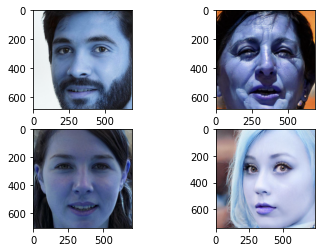

In [4]:
## Fake Samples
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(fake_samplanes[0])
axarr[0,1].imshow(fake_samples[1])
axarr[1,0].imshow(fake_samples[2])
axarr[1,1].imshow(fake_samples[3])

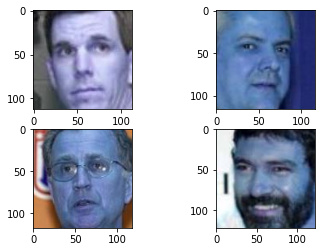

In [5]:
## Real Samples
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(real_samples[0])
axarr[0,1].imshow(real_samples[1])
axarr[1,0].imshow(real_samples[2])
axarr[1,1].imshow(real_samples[3])

### Importing dependencies for Model Training

In [1]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam
from keras.utils import to_categorical

Using TensorFlow backend.


### Defining Model architecture

In [2]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (200,200,3),activation = 'relu',padding='same',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

### Defining Image Data Generator

In [3]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [4]:
train = datagen.flow_from_directory('Fake_Dataset/Train/',
                                    class_mode='binary',
                                    batch_size=64,
                                    target_size=(200,200))

test = datagen.flow_from_directory('Fake_Dataset/Test/',
                                    class_mode='binary',
                                    batch_size=64,
                                    target_size=(200,200))

Found 14954 images belonging to 2 classes.
Found 5046 images belonging to 2 classes.


### Training Model

In [10]:
history = model.fit_generator(train,
                              validation_data=(test),
                              epochs = 50,
                              steps_per_epoch=len(train),
                              validation_steps=len(test))

Epoch 1/50
234/234 [==============================] - 1670s 7s/step - loss: 0.1179 - acc: 0.9565 - val_loss: 0.0865 - val_acc: 0.9667
Epoch 2/50
234/234 [==============================] - 1641s 7s/step - loss: 0.1962 - acc: 0.9269 - val_loss: 0.1060 - val_acc: 0.9649
Epoch 3/50
234/234 [==============================] - 1737s 7s/step - loss: 0.1331 - acc: 0.9486 - val_loss: 0.1009 - val_acc: 0.9633
Epoch 4/50
234/234 [==============================] - 1673s 7s/step - loss: 0.0919 - acc: 0.9635 - val_loss: 0.1043 - val_acc: 0.9637
Epoch 5/50
234/234 [==============================] - 76306s 326s/step - loss: 0.0757 - acc: 0.9701 - val_loss: 0.0771 - val_acc: 0.9659
Epoch 6/50
234/234 [==============================] - 1669s 7s/step - loss: 0.0620 - acc: 0.9760 - val_loss: 0.0589 - val_acc: 0.9766
Epoch 7/50
234/234 [==============================] - 1658s 7s/step - loss: 0.0612 - acc: 0.9751 - val_loss: 0.0517 - val_acc: 0.9804
Epoch 8/50
234/234 [==============================] - 1659s

KeyboardInterrupt: 

**the accuracy of the model with selected architecture was best so I have this architure with 98.5 accuracy**

### Loading and Testing the Saved Model

In [6]:
from keras.models import load_model, model_from_json
from PIL import Image
import json
import numpy as np 

In [7]:
json_file = open('model.json','r')
loaded_model = json_file.read()
json_file.close()

In [9]:
load_model = model_from_json(loaded_model)

In [10]:
load_model.load_weights('model.h5')

In [11]:
load_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)      

### Test model on images

Fake Face Image


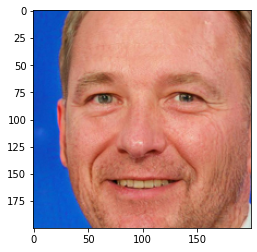

In [19]:
## Fake Image
image = Image.open('fake (4372).jpg')
im = image.resize((200,200))
plt.imshow(im)
im = np.asarray(im)
im = np.reshape(im,(1,im.shape[0],im.shape[1],im.shape[2]))

prediction = load_model.predict(im)[0]
if prediction[0] == 1:
    print('Real Face Image')
else:
    print('Fake Face Image')

Real Face Image


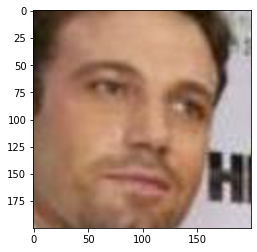

In [18]:
## Real Image
image = Image.open('real (4372).jpg')
im = image.resize((200,200))
plt.imshow(im)
im = np.asarray(im)
im = np.reshape(im,(1,im.shape[0],im.shape[1],im.shape[2]))

prediction = load_model.predict(im)[0]
if prediction[0] == 1:
    print('Real Face Image')
else:
    print('Fake Face Image')